### 1. Select a dataset with a continuous target variable.

### 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

### 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
from env import host, user, password
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import wrangle as w
from sklearn.impute import SimpleImputer

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [2]:
df, X_exp, X_train, X_validate, X_test, y_train, y_validate, y_test = w.wrangle_zillow()

`prop_value` will be our continuous target variable!

#### Pick better baseline model from using mean and median as target prediction

In [8]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict baseline's mean prediction
base_mean = y_train['prop_value'].mean()
y_train['base_mean'] = base_mean
y_validate['base_mean'] = base_mean

# 2. compute G3_pred_median
base_median = y_train['prop_value'].median()
y_train['base_median'] = base_median
y_validate['base_median'] = base_median

# 3. RMSE of G3_pred_mean
rmse_train = mean_squared_error(y_train.prop_value, y_train.base_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.prop_value, y_validate.base_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.prop_value, y_train.base_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.prop_value, y_validate.base_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  198745.17 
Validate/Out-of-Sample:  198952.46
RMSE using Median
Train/In-Sample:  201149.33 
Validate/Out-of-Sample:  201338.9


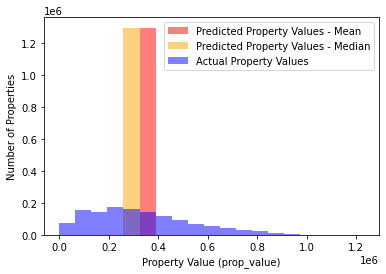

In [158]:
# plot to visualize actual vs predicted.
bins = np.arange(0,len(y_train), len(y_train)/20)
plt.hist(y_train.base_mean, color='red', bins=bins, alpha=.5, rwidth=10, label="Predicted Property Values - Mean")
plt.hist(y_train.base_median, color='orange', bins=bins, alpha=.5, rwidth=10, label="Predicted Property Values - Median")
plt.hist(y_train.prop_value, color='blue', bins=bins, rwidth=10,alpha=.5, label="Actual Property Values")
plt.xlabel("Property Value (prop_value)")
plt.ylabel("Number of Properties")
plt.legend()
plt.show()

### OLS

In [172]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.prop_value)

# predict train
y_train['lm_yhat'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.prop_value, y_train.lm_yhat)**(1/2)

# predict validate
y_validate['lm_yhat'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.prop_value, y_validate.lm_yhat)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  2.011116481318081e-09 
Validation/Out-of-Sample:  2.0138239444895573e-09


### Lasso + Lars

In [160]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.prop_value)

# predict train
y_train['lars_yhat'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.prop_value, y_train.lars_yhat)**(1/2)

# predict validate
y_validate['lars_yhat'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.prop_value, y_validate.lars_yhat)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  1138.0101054033698 
Validation/Out-of-Sample:  1139.1970857548042


### TweedieRegressor (GLM)

In [161]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.prop_value)

# predict train
y_train['glm_yhat'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.prop_value, y_train.glm_yhat)**(1/2)

# predict validate
y_validate['glm_yhat'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.prop_value, y_validate.glm_yhat)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  64504.93382418414 
Validation/Out-of-Sample:  64678.3549119714


### Polynomial Regression
#### PolynomialFeatures

In [180]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

#### LinearRegression

In [181]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.prop_value)

# predict train
y_train['lm2_yhat'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.prop_value, y_train.lm2_yhat)**(1/2)

# predict validate
y_validate['lm2_yhat'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.prop_value, y_validate.lm2_yhat)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  9.54984761625643e-10 
Validation/Out-of-Sample:  9.577194917246504e-10


## Evaluate - Plotting

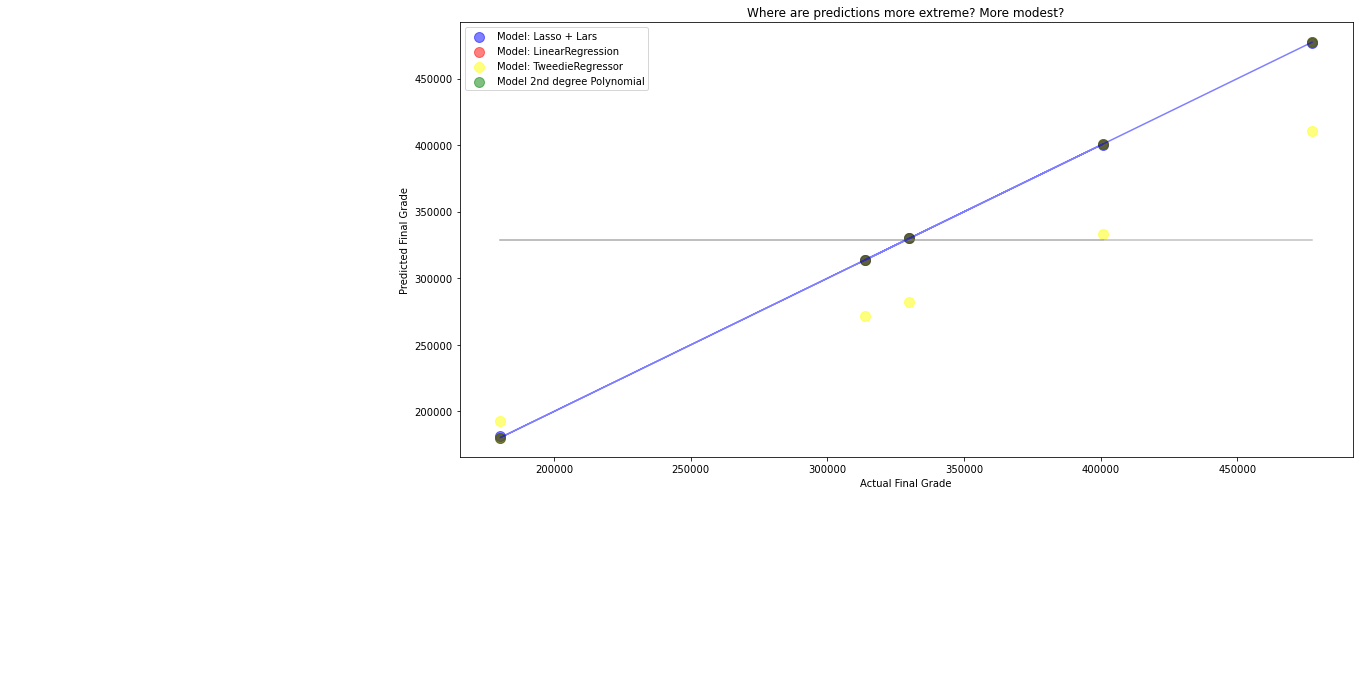

In [182]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.prop_value.head(), y_validate.base_mean.head(), alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.prop_value.head(), y_validate.prop_value.head(), alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.prop_value.head(), y_validate.lars_yhat.head(), 
            alpha=.5, color="blue", s=100, label="Model: Lasso + Lars")
plt.scatter(y_validate.prop_value.head(), y_validate.lm_yhat.head(), 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.prop_value.head(), y_validate.glm_yhat.head(), 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.prop_value.head(), y_validate.lm2_yhat.head(), 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

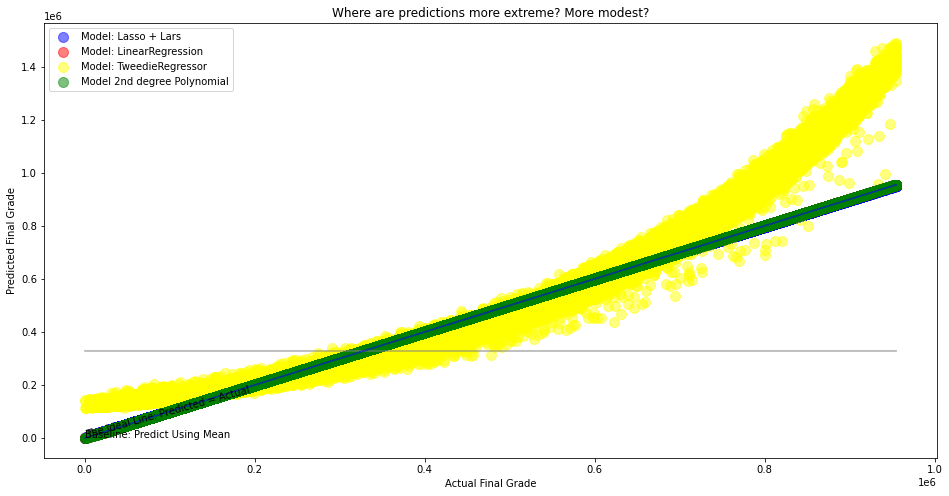

In [183]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.prop_value, y_validate.base_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.prop_value, y_validate.prop_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.prop_value, y_validate.lars_yhat, 
            alpha=.5, color="blue", s=100, label="Model: Lasso + Lars")
plt.scatter(y_validate.prop_value, y_validate.lm_yhat, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.prop_value, y_validate.glm_yhat, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.prop_value, y_validate.lm2_yhat, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

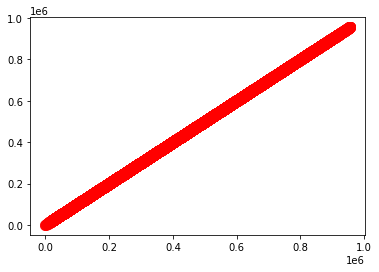

In [178]:
plt.scatter(y_validate.prop_value, y_validate.lm_yhat, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")

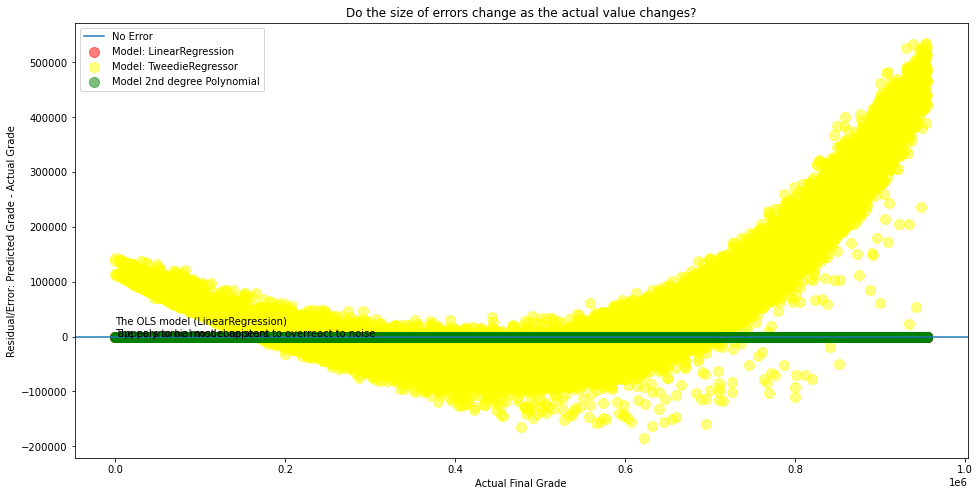

In [179]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.prop_value, y_validate.lm_yhat-y_validate.prop_value, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.prop_value, y_validate.glm_yhat-y_validate.prop_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.prop_value, y_validate.lm2_yhat-y_validate.prop_value, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Residual/Error: Predicted Grade - Actual Grade")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()